In [2]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [3]:
from defectlib import maybe_pickle

In [5]:
maybe_pickle('./defect_tensors_D10/SIM/')


  0%|          | 0/3 [00:00<?, ?it/s]


OSError: [Errno 20] Not a directory: './defect_tensors_D10/SIM/2A/SIM_2A_c0/0 2AAAAAA_19.jpg'

In [5]:
defect_dict = load_tensors_all('./defect_tensors_D10/SIM/', width=128)

(500, 385, 341)
(44, 385, 341)
(0, 256, 256)
(219, 350, 399)
(26, 350, 399)
(28, 350, 399)


In [6]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 817
number of class 0: 719
	number of SN: 15
number of class 1: 70
	number of SN: 2
number of class 2: 28
	number of SN: 3


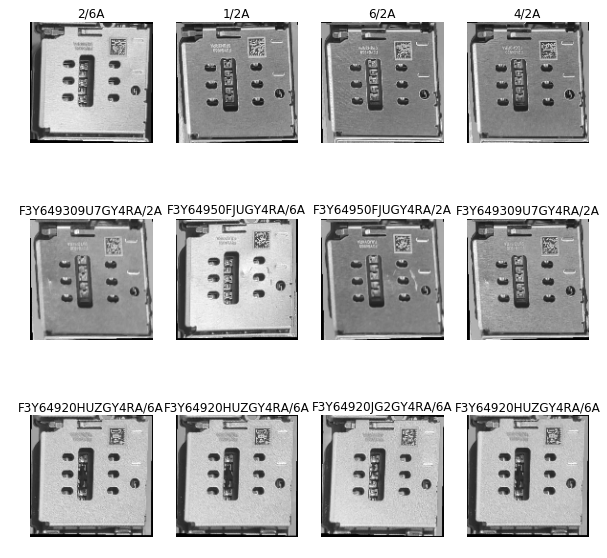

In [7]:
display_tensor(tensors, labels, sns)

In [8]:
from defectlib import GroupKFold_modeling

In [10]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=3, nb_epoch=20, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: 1
Train on 763 samples, validate on 54 samples
Epoch 1/20
763/763 [==============================] - 25s - loss: 0.5216 - acc: 0.8532 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 2/20
763/763 [==============================] - 23s - loss: 0.3896 - acc: 0.8702 - val_loss: 0.0915 - val_acc: 1.0000
Epoch 3/20
763/763 [==============================] - 23s - loss: 0.2724 - acc: 0.9056 - val_loss: 0.4627 - val_acc: 1.0000
Epoch 4/20
763/763 [==============================] - 24s - loss: 0.2252 - acc: 0.9148 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 5/20
763/763 [==============================] - 23s - loss: 0.1571 - acc: 0.9489 - val_loss: 0.0290 - val_acc: 1.0000
Epoch 6/20
763/763 [==============================] - 23s - loss: 0.1275 - acc: 0.9489 - val_loss: 0.0208 - val_acc: 1.0000
Epoch 7/20
763/763 [==============================] - 24s - loss: 0.1142 - acc: 0.9567 - val_loss: 0.1417 - val_acc: 1.0000
Epoch 8/20
763/

In [11]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '1', 1.0, 1.0),
 (0, '0', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '12', 1.0, 1.0),
 (0, '9', 1.0, 1.0),
 (0, '10', 1.0, 1.0),
 (0, '13', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '11', 1.0, 1.0),
 (0, '14', 1.0, 1.0),
 (1, 'F3Y64950FJUGY4RA', 0.3611111111111111, 0.6388888888888888),
 (1, 'F3Y649309U7GY4RA', 0.38235294117647056, 0.6176470588235294),
 (2, 'F3Y64920HUZGY4RA', 1.0, 0.0),
 (2, 'F3Y64920JG2GY4RA', 1.0, 0.0),
 (2, 'F3Y649108FLGY4RA', 1.0, 0.0)]